In [1]:
import os
import sys

# Adicionar diretório pai ao path para imports
sys.path.insert(0, os.path.abspath('..'))

import matplotlib.pyplot as plt
from utils.chart_utils import (
    load_forecasts_for_regions,
    load_product_forecasts,
    setup_plot_style,
    plot_forecast_only_chart,
    save_figure
)

# ============================================================================
# CONFIGURAÇÕES GLOBAIS
# ============================================================================

MODEL = 'RNN'
FORECAST_HORIZON = 12
ANO_PREVISAO = 2026
REGIONS = ['ilheus', 'itabuna']
PRODUTOS = ['acucar', 'arroz', 'banana', 'cafe', 'carne', 'farinha',
            'feijao', 'leite', 'manteiga', 'oleo', 'pao', 'tomate']

QUANTIDADES = {
    'acucar': 3.0, 'arroz': 3.6, 'banana': 7.5, 'cafe': 0.3,
    'carne': 4.5, 'farinha': 3.0, 'feijao': 4.5, 'leite': 6.0,
    'manteiga': 0.75, 'oleo': 1.0, 'pao': 6.0, 'tomate': 12.0
}

MESES_LABELS = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Configurações visuais dos produtos
MARKERS_PRODUTOS = ['s', '.', 'v', 'p', 'p', 'X', '*', 'D', '^', '8', 'P', '>']
COLORS_PRODUTOS = ['#0004c7', '#c9261a', '#c1c718', '#57210a', '#6fad11', '#039eff',
                   '#ffb100', '#00fa08', '#ff0044', '#210109', '#780c6d', '#b200b5']
MARKERS_SIZE = [8, 17, 10, 10, 10, 10, 15, 8, 10, 10, 10, 10]
YTICKS_PRODUTOS = [f'{v},00' for v in range(10, 90, 10)]
LINE_SIZE = 2

# Previsão 12 meses da cesta básica e produtos

## Cesta Básica

In [2]:
# Carregar previsões da cesta básica
previsoes_cesta = load_forecasts_for_regions(MODEL, 'cesta_basica', REGIONS, FORECAST_HORIZON)

print(f"✅ Previsões da cesta básica carregadas para {len(REGIONS)} regiões")

✅ Previsões da cesta básica carregadas para 2 regiões


✅ Gráfico salvo em: ../../output/figure/previsao_12_meses_cesta_basica_2026.png


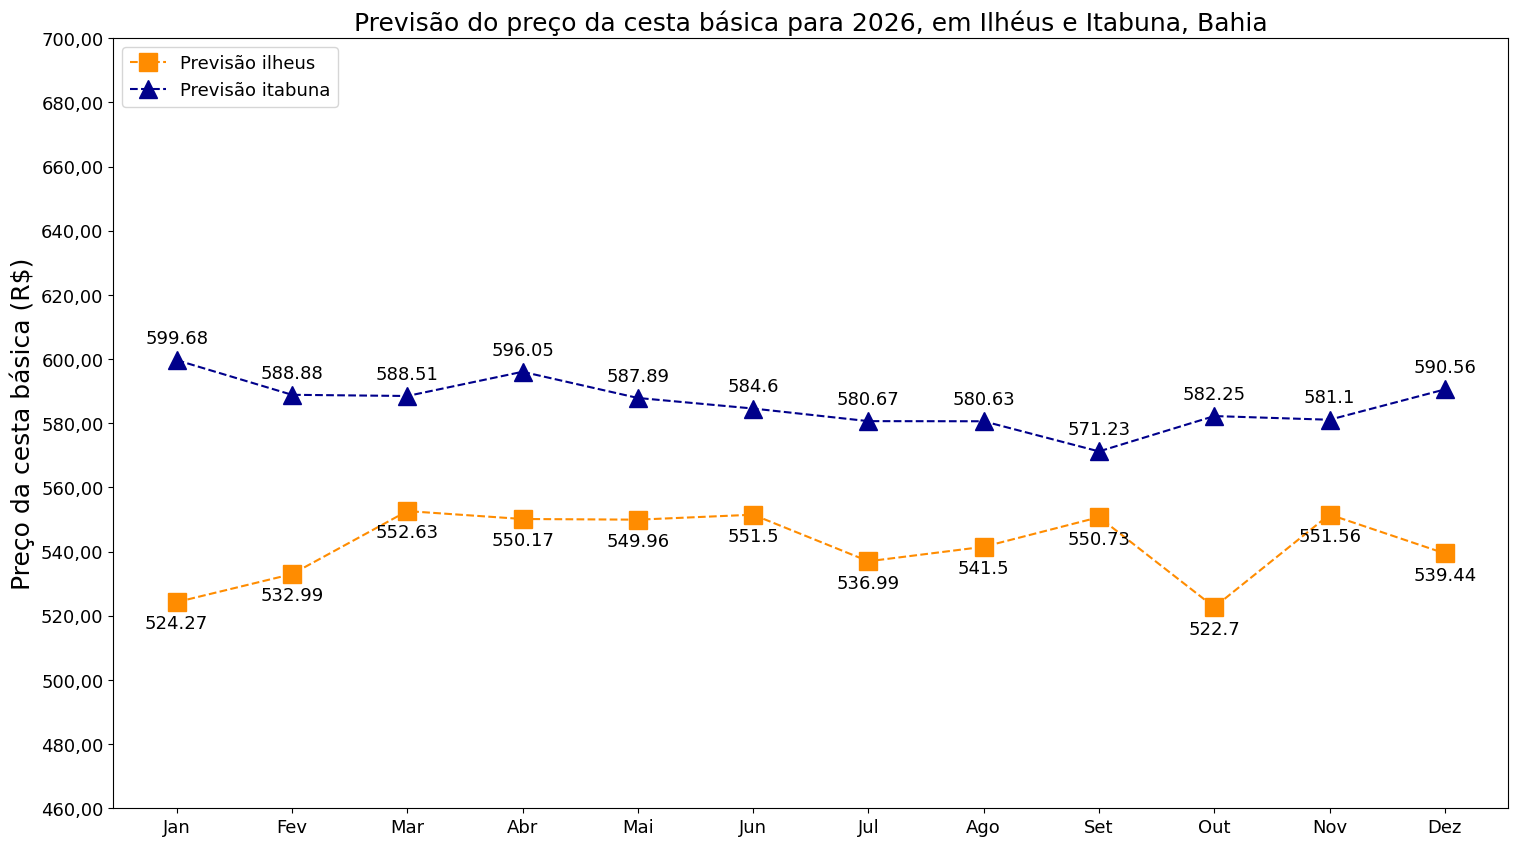

In [3]:
# Gerar gráfico da cesta básica
MARKERS = ['s', '^']
COLORS = ['darkorange', 'darkblue']
YTICKS_LABELS = [f'{v},00' for v in range(460, 720, 20)]

fig, ax = setup_plot_style(figsize=(18, 10))

# Plotar linhas
for region, marker, color in zip(REGIONS, MARKERS, COLORS):
    ax.plot(range(12), previsoes_cesta[region],
            label=f'Previsão {region}',
            color=color, marker=marker, ls='--', markersize=13)

# Adicionar anotações
for region in REGIONS:
    for mes, valor in enumerate(previsoes_cesta[region]):
        ilheus_val = previsoes_cesta['ilheus'][mes]
        itabuna_val = previsoes_cesta['itabuna'][mes]

        if region == "ilheus":
            offset = 4 if valor >= itabuna_val else -4
            va = 'bottom' if valor >= itabuna_val else 'top'
        else:
            offset = 4 if valor >= ilheus_val else -4
            va = 'bottom' if valor >= ilheus_val else 'top'

        ax.annotate(str(round(valor, 2)), xy=(mes, valor + offset),
                   size=13, va=va, ha='center')

# Formatação
ax.set_ylabel("Preço da cesta básica (R$)", size=18)
ax.set_xticks(range(12))
ax.set_xticklabels(MESES_LABELS, size=13)
ax.set_yticks(range(460, 720, 20))
ax.set_yticklabels(YTICKS_LABELS, size=13)
ax.set_title(f"Previsão do preço da cesta básica para {ANO_PREVISAO}, em Ilhéus e Itabuna, Bahia", size=18)
ax.legend(loc='upper left', fontsize=13)

# Salvar
save_figure(f'../../output/figure/previsao_{FORECAST_HORIZON}_meses_cesta_basica_{ANO_PREVISAO}.png')
plt.show()

## Produtos da cesta básica

In [4]:
# Carregar previsões dos produtos
previsoes_produtos = load_product_forecasts(MODEL, REGIONS, PRODUTOS, QUANTIDADES, FORECAST_HORIZON)

print(f"✅ Previsões carregadas para {len(PRODUTOS)} produtos em {len(REGIONS)} regiões")

✅ Previsões carregadas para 12 produtos em 2 regiões


### Previsão dos produtos de Ilhéus

✅ Gráfico salvo em: ../../output/figure/produtos_ilheus/previsao_12_meses_produtos_ilheus_2026.png


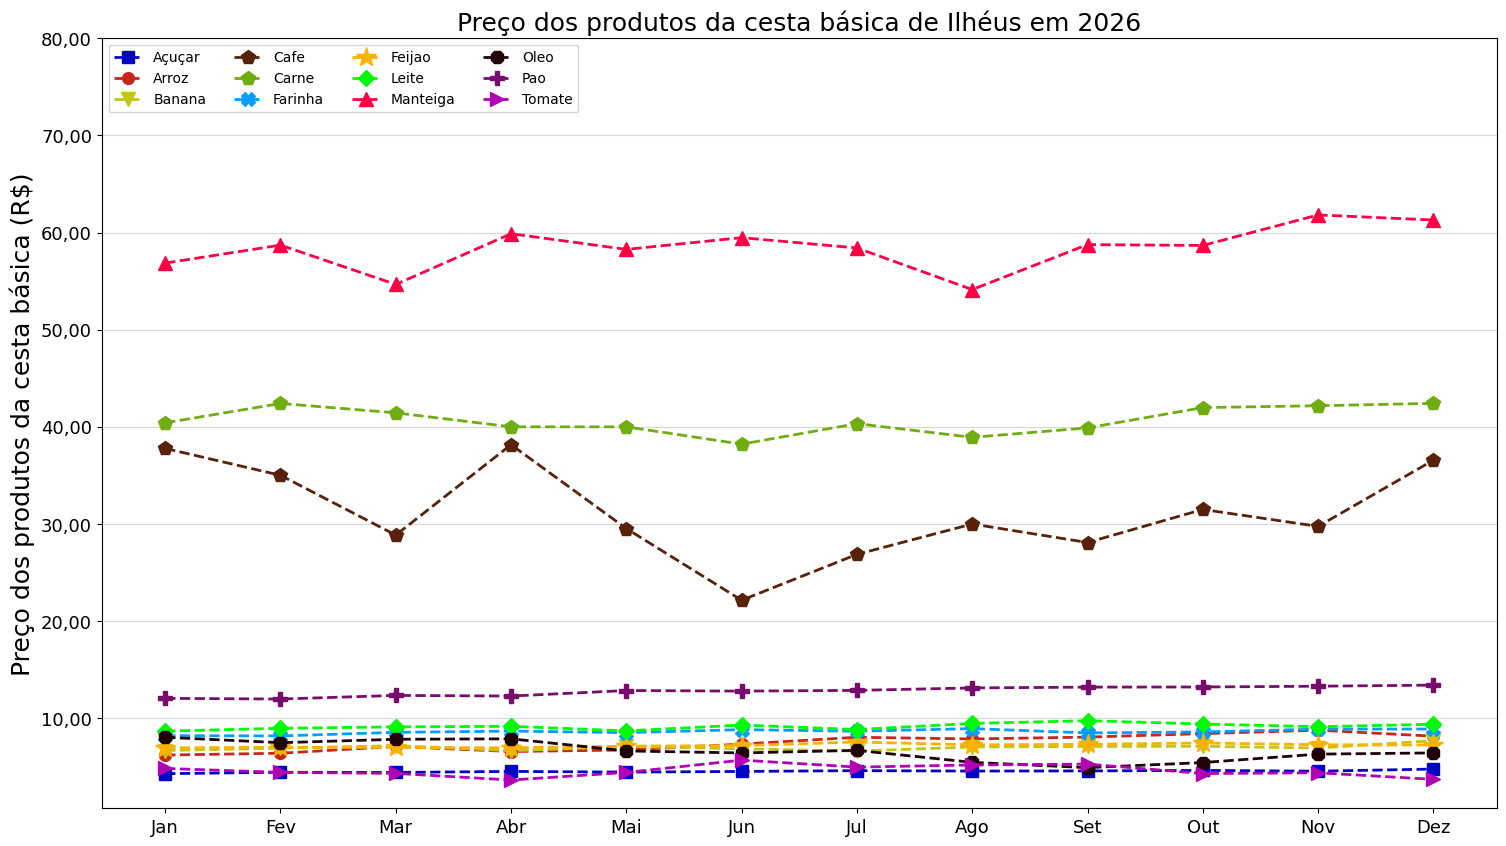

In [5]:
# Criar figura usando função utilitária
fig, ax = setup_plot_style(figsize=(18, 10))

# Plotar produtos usando função utilitária
plot_forecast_only_chart(
    ax, PRODUTOS, previsoes_produtos['ilheus'],
    MARKERS_PRODUTOS, COLORS_PRODUTOS, MARKERS_SIZE,
    LINE_SIZE, MESES_LABELS, range(10, 90, 10), YTICKS_PRODUTOS
)

# Título e legenda
ax.set_title(f"Preço dos produtos da cesta básica de Ilhéus em {ANO_PREVISAO}", size=18)
ax.legend(ncol=4, loc='upper left')

# Salvar
save_figure(f'../../output/figure/produtos_ilheus/previsao_{FORECAST_HORIZON}_meses_produtos_ilheus_{ANO_PREVISAO}.png')
plt.show()

### Previsão dos produtos de Itabuna

✅ Gráfico salvo em: ../../output/figure/produtos_itabuna/previsao_12_meses_produtos_itabuna_2026.png


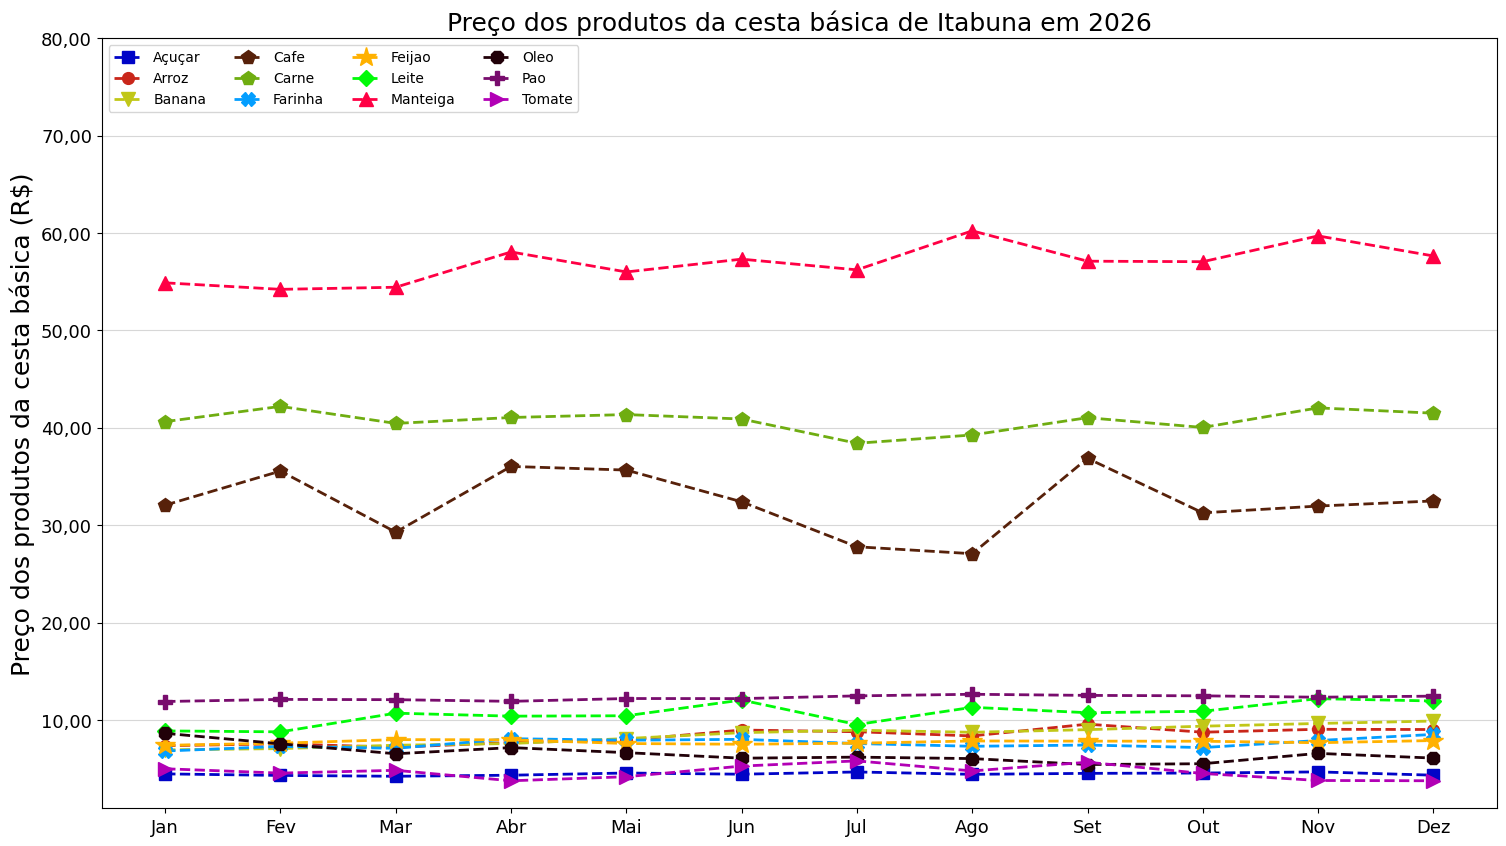

In [6]:
# Criar figura usando função utilitária
fig, ax = setup_plot_style(figsize=(18, 10))

# Plotar produtos usando função utilitária
plot_forecast_only_chart(
    ax, PRODUTOS, previsoes_produtos['itabuna'],
    MARKERS_PRODUTOS, COLORS_PRODUTOS, MARKERS_SIZE,
    LINE_SIZE, MESES_LABELS, range(10, 90, 10), YTICKS_PRODUTOS
)

# Título e legenda
ax.set_title(f"Preço dos produtos da cesta básica de Itabuna em {ANO_PREVISAO}", size=18)
ax.legend(ncol=4, loc='upper left')

# Salvar
save_figure(f'../../output/figure/produtos_itabuna/previsao_{FORECAST_HORIZON}_meses_produtos_itabuna_{ANO_PREVISAO}.png')
plt.show()